# Predictive Maintenance `Trained Model`

In [1]:
from main import df as df
import matplotlib.pyplot as plt

C:\Users\Kajornphat\Anaconda3\lib\site-packages\rpy2\robjects\lib\dplyr.py:24: UserWarning: This was designed againt dplyr version 0.7.5 but you have 0.8.3
  warnings.warn('This was designed againt dplyr version %s but you have %s' % (TARGET_VERSION, dplyr.__version__))
C:\Users\Kajornphat\Anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


## Import Sklearn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [3]:
name = list(df)
name.remove('t_stamp')
name.remove('target')

In [6]:
X = df[name]
y = df['target']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

C:\Users\Kajornphat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


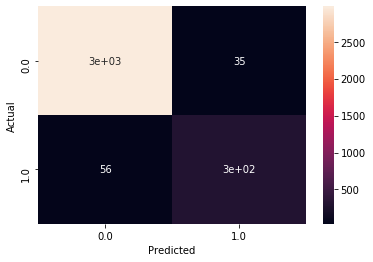

In [9]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [10]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9730050430139424


In [11]:
df1 = y_test.to_frame()

In [12]:
df1['prediction'] =  y_pred

In [13]:
df1 = df1.join(df['t_stamp'])

In [16]:
def missclassified(df):
    df = df.sort_values(by=['t_stamp'])
    
    t_stamp = df['t_stamp']
    y_actual = df['target']
    y_pred = df['prediction']
    
    fig = plt.figure(figsize=(50, 10))
    plt.plot_date(t_stamp, y_pred, label='Prediction', c='blue')
    plt.plot(t_stamp, y_actual, label='Actual', c='red')
    
    plt.title('Missclassified Sample')
    plt.ylim(-0.05, 1.2)
    plt.legend()
    fig.savefig('misclassified_observation.png')


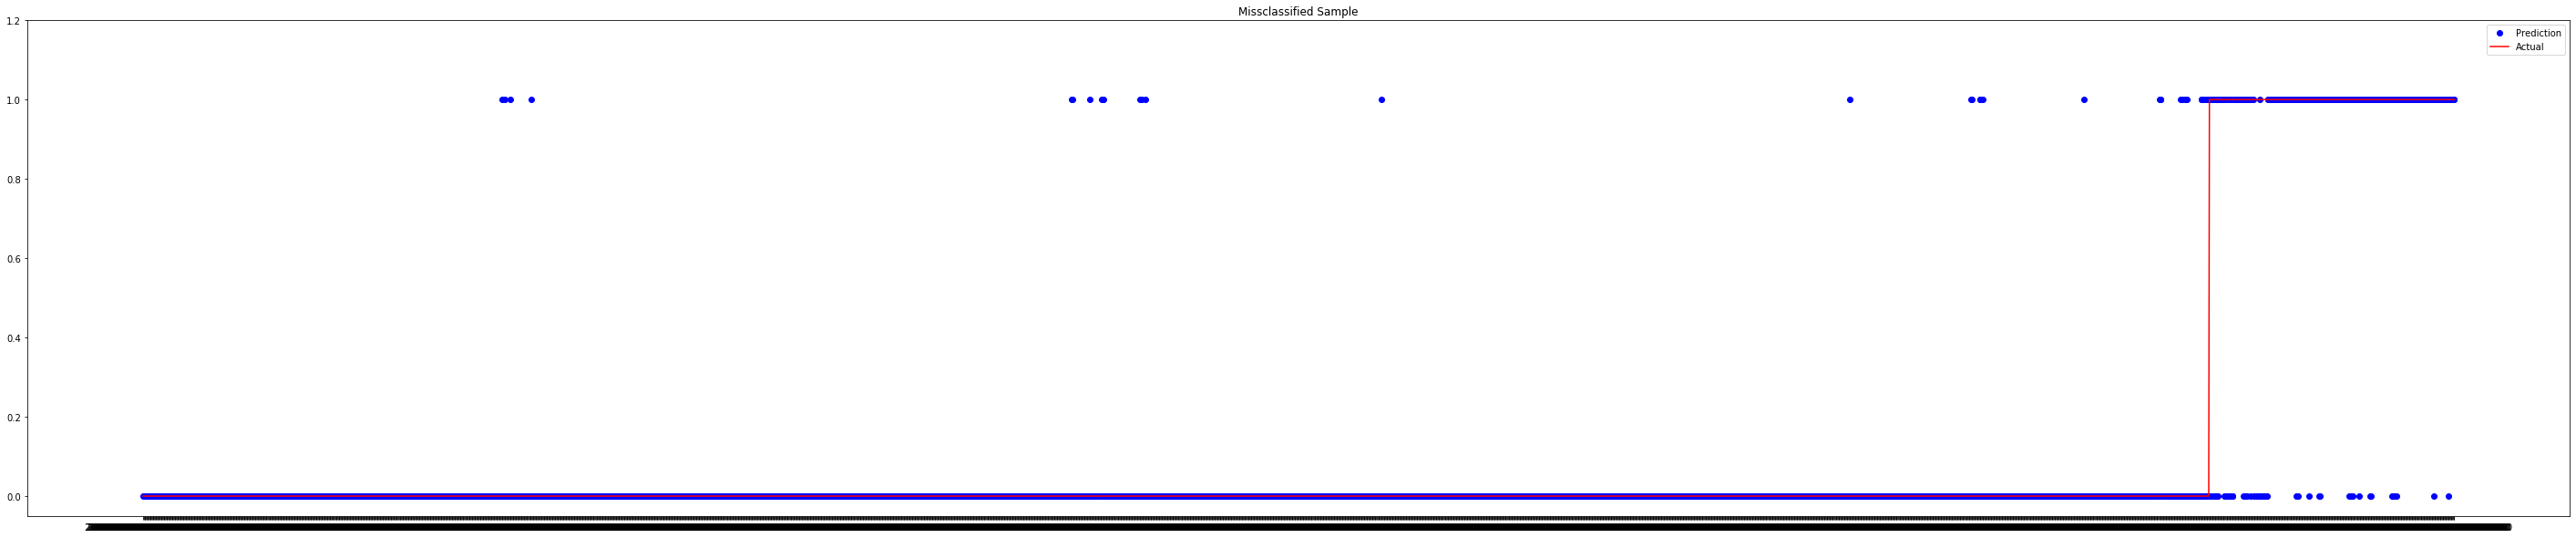

In [17]:
azureml_main(df1)